In [ ]:
# Build Your First Stateful Agent

# Task :Build a simple customer support chatbot that remembers conversation context.

In [ ]:
# 1. Install required packages
%pip install -q langgraph langchain langchain-openai python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
#2.  import libraries

from langgraph.graph import START, END, StateGraph, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from IPython.display import Image, display, Markdown
import os
import ipywidgets as widgets
print("✅ All imports successful")

✅ All imports successful


In [3]:
# 3. Setup OpenAI APi key

# Load environment variables
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")

if not openai_api_key:
    raise ValueError("OPENAI_API_KEY not found! Please set it in your .env file.")

print("✅ API key loaded successfully")


✅ API key loaded successfully


In [4]:
# Initialize the LLM

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.7,
    api_key=openai_api_key
)

print(f"✅ LLM initialized: {llm.model_name}")

✅ LLM initialized: gpt-4o-mini


In [5]:
# CREATE THE NODE

# System prompt that defines assistant behavior
sys_msg = SystemMessage(
    content="You are a helpful and patient customer support assistant. Your primary goal is to resolve customer issues by understanding the conversation history and providing accurate relevant solution"
)

def assistant(state: MessagesState) -> dict:
    """
    The assistant node - processes messages and generates response.
    """
    # Combine system prompt with conversation history
    messages = [sys_msg] + state["messages"]
    
    # Get response from LLM
    response = llm.invoke(messages)
    
    # Return as state update
    return {"messages": [AIMessage(content=response.content)]}

print("✅ Assistant node defined")

✅ Assistant node defined


In [6]:
# BUILDING THE GRAPH

# Create a StateGraph with MessagesState
builder = StateGraph(MessagesState)

# Add the assistant node
builder.add_node("assistant", assistant)

# Define the flow:
# START → assistant → END
builder.add_edge(START, "assistant")
builder.add_edge("assistant", END)

print("✅ Graph structure Successfully defined")

✅ Graph structure Successfully defined


In [7]:
#  CREATE CHECK POINTER MEMORY

# Create a memory checkpointer (stores in memory)
memory = MemorySaver()

# Compile the graph WITH memory
agent = builder.compile(checkpointer=memory)

print("✅ Agent compiled with memory")

✅ Agent compiled with memory


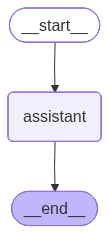

In [8]:
# Visualize the graph structure
try:
    display(Image(agent.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not display graph: {e}")
    print("Graph structure: START → assistant → END")

In [ ]:
#  RUNNING THE AGENT



In [9]:
# CREATE SESSION ID
# Define a session ID for this conversation
session_id = "chat-session-0001"

print(f"Starting conversation with session ID: {session_id}")

Starting conversation with session ID: chat-session-0001


In [10]:
# CREATE HELPER FUNCTION FOR THE CONVERSATION

def run_conversation(user_input: str, thread_id: str = session_id):
    """
    Send a message to the agent and get response.
    WARNING:
    In production, ALWAYS provide unique thread_id per user.
    """
    # Invoke the agent
    result = agent.invoke(
        {"messages": [HumanMessage(content=user_input)]},
        config={"configurable": {"thread_id": thread_id}}
    )
    
    # Print the conversation
    for message in result["messages"]:
        if isinstance(message, HumanMessage):
            print(f"\n👤 User: {message.content}")
        elif isinstance(message, AIMessage):
            print(f"🤖 Agent: {message.content}")
    
    print("\n" + "="*70)

print("✅ Conversation function ready")

✅ Conversation function ready


In [11]:
#  Testing with Single Test

# Single Turn Conversation
run_conversation("Hello! What's your name?")


👤 User: Hello! What's your name?
🤖 Agent: Hello! I'm your customer support assistant. How can I help you today?



In [12]:
# Single Turn Conversation
run_conversation("Assalam alaykum?")


👤 User: Hello! What's your name?
🤖 Agent: Hello! I'm your customer support assistant. How can I help you today?

👤 User: Assalam alaykum?
🤖 Agent: Wa alaykum as-salam! How can I assist you today?



In [13]:
# Single Turn Conversation
run_conversation("I bought a Lenovo Laptop last month")


👤 User: Hello! What's your name?
🤖 Agent: Hello! I'm your customer support assistant. How can I help you today?

👤 User: Assalam alaykum?
🤖 Agent: Wa alaykum as-salam! How can I assist you today?

👤 User: I bought a Lenovo Laptop last month
🤖 Agent: That's great! I hope you're enjoying your new Lenovo laptop. Is there something specific you need help with regarding your laptop?



In [14]:
# Single Turn Conversation
run_conversation("The laptop is not functioning well")


👤 User: Hello! What's your name?
🤖 Agent: Hello! I'm your customer support assistant. How can I help you today?

👤 User: Assalam alaykum?
🤖 Agent: Wa alaykum as-salam! How can I assist you today?

👤 User: I bought a Lenovo Laptop last month
🤖 Agent: That's great! I hope you're enjoying your new Lenovo laptop. Is there something specific you need help with regarding your laptop?

👤 User: The laptop is not functioning well
🤖 Agent: I'm sorry to hear that your laptop is not functioning well. Can you please provide more details about the issues you're experiencing? This will help me assist you better.



In [15]:
# Single Turn Conversation
run_conversation("Is asking me to update window and i did not know how to go about it")


👤 User: Hello! What's your name?
🤖 Agent: Hello! I'm your customer support assistant. How can I help you today?

👤 User: Assalam alaykum?
🤖 Agent: Wa alaykum as-salam! How can I assist you today?

👤 User: I bought a Lenovo Laptop last month
🤖 Agent: That's great! I hope you're enjoying your new Lenovo laptop. Is there something specific you need help with regarding your laptop?

👤 User: The laptop is not functioning well
🤖 Agent: I'm sorry to hear that your laptop is not functioning well. Can you please provide more details about the issues you're experiencing? This will help me assist you better.

👤 User: Is asking me to update window and i did not know how to go about it
🤖 Agent: No problem! I can guide you through the process of updating Windows on your Lenovo laptop. Here are the steps:

1. **Connect to the Internet**: Make sure your laptop is connected to the internet.

2. **Open Settings**:
   - Click on the **Start** button (Windows logo) in the bottom-left corner of your scree